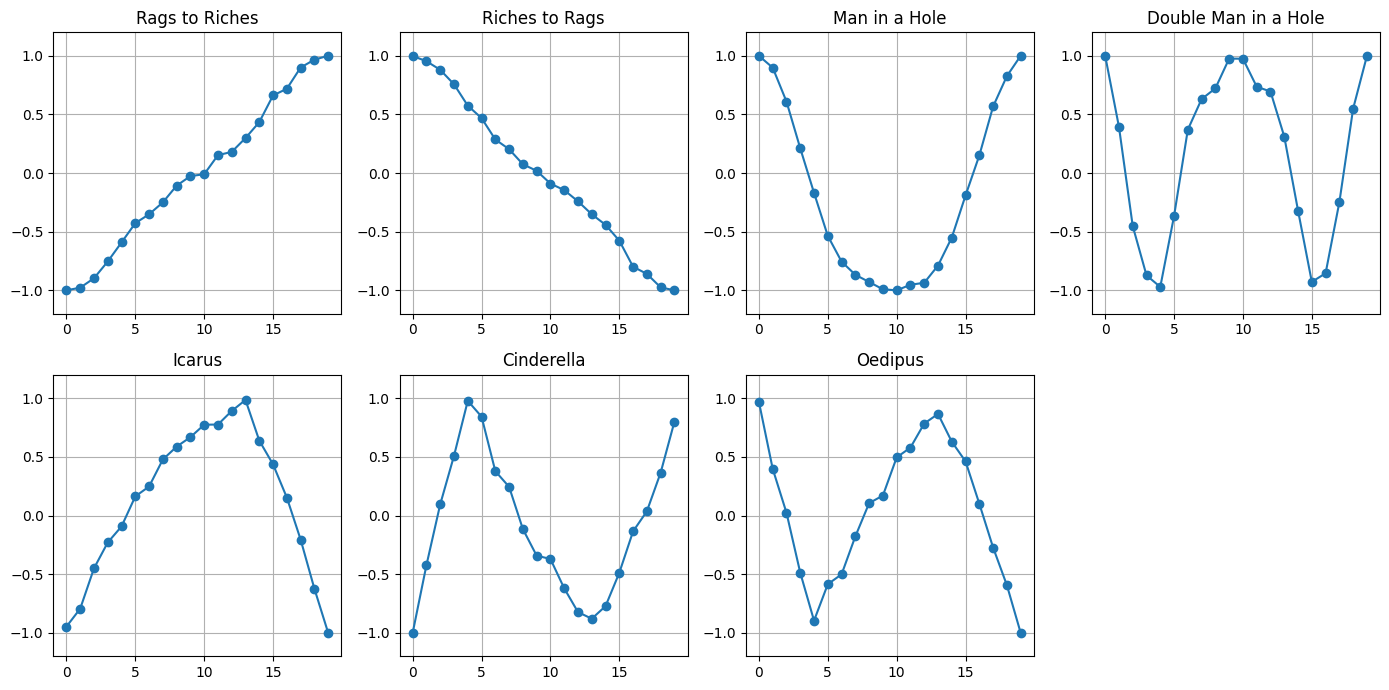

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def warp_domain(t, warp_strength=0.0):
    """
    Warps the domain array t by adding small random (or sinusoidal) distortions.
    The stronger the warp_strength, the more it skews the curve.
    
    This particular implementation:
      1) Adds a small sinusoidal component: warp_strength * 0.2 * sin(2*pi * t)
      2) Adds a small uniform random offset: warp_strength * uniform(-0.05, 0.05)
      3) Clamps the result to [0, 1]

    Returns a new array t_warped of the same length as t.
    """
    # Make a copy so as not to alter original t in-place
    t_warped = t.copy()
    
    # Add a small sinusoidal distortion
    t_warped += warp_strength * 0.2 * np.sin(2 * np.pi * t_warped)
    
    # Add a small uniform random offset
    random_offsets = warp_strength * np.random.uniform(-0.05, 0.05, size=len(t_warped))
    t_warped += random_offsets
    
    # Clamp to [0, 1]
    t_warped = np.clip(t_warped, 0, 1)
    
    # We do NOT sort t_warped here, so the curve can fold back a bit on itself.
    # If you'd like to preserve the strictly increasing order, you could sort;
    # that, however, changes the indexing of points.
    
    return t_warped

def rags_to_riches(n=20, warp_strength=0.0):
    """
    Starts near -1 and ends near +1 with a smooth rise.
    By default, uses -cos(pi*t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = -np.cos(np.pi * t2)
    return y

def riches_to_rags(n=20, warp_strength=0.0):
    """
    Starts near +1 and ends near -1 with a smooth decline.
    By default, uses cos(pi*t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(np.pi * t2)
    return y

def man_in_a_hole(n=20, warp_strength=0.0):
    """
    One full cosine wave: cos(2*pi * t).
    Starts at +1, dips to -1 around t=0.5, then returns to +1.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(2 * np.pi * t2)
    return y

def double_man_in_a_hole(n=20, warp_strength=0.0):
    """
    Two full cosine waves: cos(4*pi * t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(4 * np.pi * t2)
    return y

def icarus(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - t in [0..0.6] -> -1 -> +1
      - t in [0.6..1] -> +1 -> -1
    Then warp the domain if warp_strength>0 to skew it.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.6:
            # -1 -> +1 from 0..0.6
            val = -1 + (x / 0.6) * 2
        else:
            # +1 -> -1 from 0.6..1
            # slope = (-2) / 0.4 = -5
            val = 1 - ( (x - 0.6) * 5 )
        y.append(val)
    return y

def cinderella(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - t in [0..0.3]: -1 -> +1
      - t in [0.3..0.6]: +1 -> -1
      - t in [0.6..1]: -1 -> +0.8
    Then warp the domain if warp_strength>0.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.3:
            val = -1 + (x / 0.3) * 2
        elif x <= 0.6:
            val = 1 - ((x - 0.3) / 0.3) * 2
        else:
            val = -1 + ((x - 0.6) / 0.4) * 1.8
        y.append(val)
    return y

def oedipus(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - fall (+1 to -1),
      - rise (-1 to +1),
      - final fall (+1 to -1).
    Then warp the domain if warp_strength>0.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.3:
            val = 1 - (x / 0.3) * 2
        elif x <= 0.6:
            val = -1 + ((x - 0.3) / 0.3) * 2
        else:
            val = 1 - ((x - 0.6) / 0.4) * 2
        y.append(val)
    return y

# ---------------------
# Example usage in Jupyter
# ---------------------

if __name__ == "__main__":
    # Choose how many points you want and how strong the warping should be:
    n = 20
    warp_strength = 0.4  # 0 = no warp, higher = bigger distortion
    
    # Generate curves
    arcs = {
        "Rags to Riches":       rags_to_riches(n, warp_strength),
        "Riches to Rags":       riches_to_rags(n, warp_strength),
        "Man in a Hole":        man_in_a_hole(n, warp_strength),
        "Double Man in a Hole": double_man_in_a_hole(n, warp_strength),
        "Icarus":               icarus(n, warp_strength),
        "Cinderella":           cinderella(n, warp_strength),
        "Oedipus":              oedipus(n, warp_strength)
    }

    # Plot all arcs in separate subplots
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 7))
    axes = axes.flatten()

    for i, (title, yvals) in enumerate(arcs.items()):
        ax = axes[i]
        ax.plot(yvals, marker='o')
        ax.set_title(title)
        ax.set_ylim([-1.2, 1.2])
        ax.grid(True)

    # Turn off any remaining subplot (8th one not used)
    if len(axes) > len(arcs):
        for j in range(len(arcs), len(axes)):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

Selected narratives:


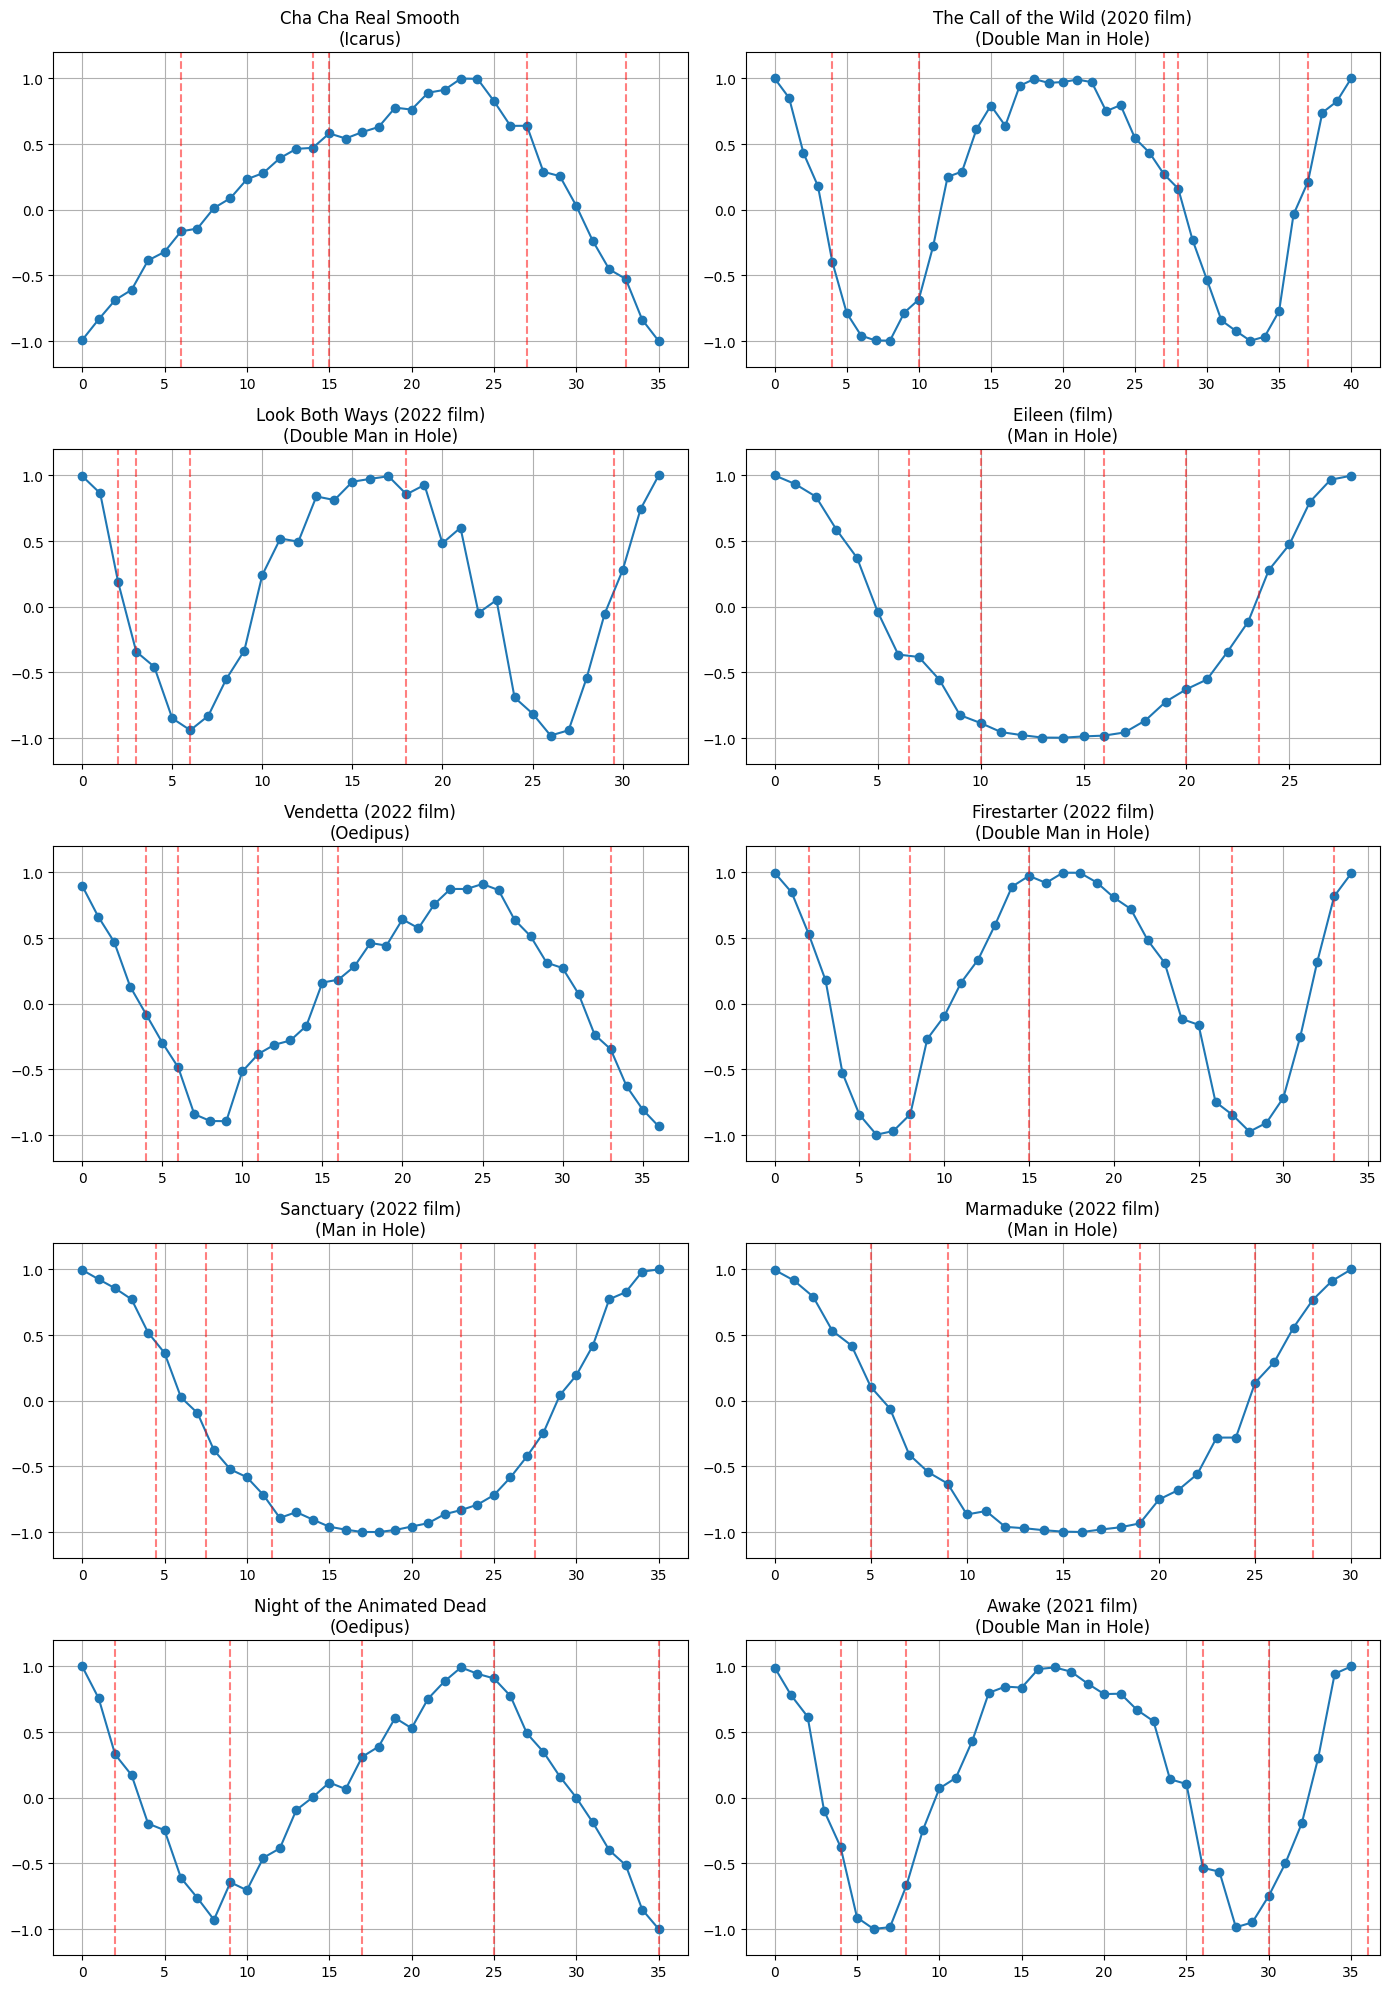

In [43]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt

def warp_domain(t, warp_strength=0.0):
    """
    Warps the domain array t by adding small random (or sinusoidal) distortions.
    The stronger the warp_strength, the more it skews the curve.
    
    This particular implementation:
      1) Adds a small sinusoidal component: warp_strength * 0.2 * sin(2*pi * t)
      2) Adds a small uniform random offset: warp_strength * uniform(-0.05, 0.05)
      3) Clamps the result to [0, 1]

    Returns a new array t_warped of the same length as t.
    """
    # Make a copy so as not to alter original t in-place
    t_warped = t.copy()
    
    # Add a small sinusoidal distortion
    t_warped += warp_strength * 0.2 * np.sin(2 * np.pi * t_warped)
    
    # Add a small uniform random offset
    random_offsets = warp_strength * np.random.uniform(-0.05, 0.05, size=len(t_warped))
    t_warped += random_offsets
    
    # Clamp to [0, 1]
    t_warped = np.clip(t_warped, 0, 1)
    
    # We do NOT sort t_warped here, so the curve can fold back a bit on itself.
    # If you'd like to preserve the strictly increasing order, you could sort;
    # that, however, changes the indexing of points.
    
    return t_warped

def rags_to_riches(n=20, warp_strength=0.0):
    """
    Starts near -1 and ends near +1 with a smooth rise.
    By default, uses -cos(pi*t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = -np.cos(np.pi * t2)
    return y

def riches_to_rags(n=20, warp_strength=0.0):
    """
    Starts near +1 and ends near -1 with a smooth decline.
    By default, uses cos(pi*t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(np.pi * t2)
    return y

def man_in_a_hole(n=20, warp_strength=0.0):
    """
    One full cosine wave: cos(2*pi * t).
    Starts at +1, dips to -1 around t=0.5, then returns to +1.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(2 * np.pi * t2)
    return y

def double_man_in_a_hole(n=20, warp_strength=0.0):
    """
    Two full cosine waves: cos(4*pi * t).
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = np.cos(4 * np.pi * t2)
    return y

def icarus(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - t in [0..0.6] -> -1 -> +1
      - t in [0.6..1] -> +1 -> -1
    Then warp the domain if warp_strength>0 to skew it.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.6:
            # -1 -> +1 from 0..0.6
            val = -1 + (x / 0.6) * 2
        else:
            # +1 -> -1 from 0.6..1
            # slope = (-2) / 0.4 = -5
            val = 1 - ( (x - 0.6) * 5 )
        y.append(val)
    return y

def cinderella(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - t in [0..0.3]: -1 -> +1
      - t in [0.3..0.6]: +1 -> -1
      - t in [0.6..1]: -1 -> +0.8
    Then warp the domain if warp_strength>0.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.3:
            val = -1 + (x / 0.3) * 2
        elif x <= 0.6:
            val = 1 - ((x - 0.3) / 0.3) * 2
        else:
            val = -1 + ((x - 0.6) / 0.4) * 1.8
        y.append(val)
    return y

def oedipus(n=20, warp_strength=0.0):
    """
    Piecewise linear:
      - fall (+1 to -1),
      - rise (-1 to +1),
      - final fall (+1 to -1).
    Then warp the domain if warp_strength>0.
    """
    t = np.linspace(0, 1, n)
    t2 = warp_domain(t, warp_strength=warp_strength)
    y = []
    for x in t2:
        if x <= 0.3:
            val = 1 - (x / 0.3) * 2
        elif x <= 0.6:
            val = -1 + ((x - 0.3) / 0.3) * 2
        else:
            val = 1 - ((x - 0.6) / 0.4) * 2
        y.append(val)
    return y

# Load ground truth arcs first
with open('data_release/ground_truth_arc.json', 'r') as f:
    ground_truth_arcs = json.load(f)

# Load the narratives from the JSON file
with open('data_release/narratives.json', 'r') as f:
    narratives = json.load(f)

# Get human-written narratives
human_narratives = {id: narrative for id, narrative in narratives.items() 
                   if narrative['source'] == "Human"}

# Keep sampling until we get exactly 10 human narratives
random_narratives = {}
while len(random_narratives) < 10:
    # Sample remaining number needed
    num_needed = 10 - len(random_narratives)
    sample_ids = random.sample(list(ground_truth_arcs.keys()), num_needed)
    
    # Add any that are human narratives
    for id in sample_ids:
        if id in human_narratives:
            random_narratives[id] = human_narratives[id]

# Print the titles and arcs of the selected narratives 
# Load turning points
with open('data_release/ground_truth_tp.json', 'r') as f:
    ground_truth_tps = json.load(f)
print("Selected narratives:")
fig, axes = plt.subplots(5, 2, figsize=(14, 20))
axes = axes.flatten()
for i, (id, narrative) in enumerate(random_narratives.items()):
    arc_type = ground_truth_arcs[id]
    turning_points = ground_truth_tps[id]
    

    # Plot the story arc
    ax = axes[i]
    
    # Get number of lines in synopsis
    n = len(narrative['synopsis'])
    
    arcs = {
        "Rags to Riches":       rags_to_riches(n, warp_strength),
        "Riches to Rags":       riches_to_rags(n, warp_strength),
        "Man in Hole":        man_in_a_hole(n, warp_strength),
        "Double Man in Hole": double_man_in_a_hole(n, warp_strength),
        "Icarus":               icarus(n, warp_strength),
        "Cinderella":           cinderella(n, warp_strength),
        "Oedipus":              oedipus(n, warp_strength)
    }
    y = arcs[arc_type]
    
    # Create x axis points from 0 to n-1
    x = np.arange(n)
        
    ax.plot(x, y, marker='o')
    ax.set_title(f"{narrative['title']}\n({arc_type})")
    ax.set_ylim([-1.2, 1.2])
    ax.grid(True)
    
    # Add vertical lines at turning points
    for tp, x_val in turning_points.items():
        ax.axvline(x=x_val, color='red', linestyle='--', alpha=0.5)

# Turn off any remaining subplots
for j in range(len(random_narratives), len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()
